## Clustering Algorithms

#### 1. Importing libraries
#### 2. Importing File
#### 3. Prepping Data
#### 4. The elbow technique
#### 5. k-means clustering

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### 2. Importing File

In [2]:
path = r'C:\Users\Nuno\05-2024 AirBnB Amsterdam Analysis'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_review_scores_analysis_cleaned.csv'))

In [4]:
df.shape

(17071, 34)

In [5]:
df.head()

,Unnamed: 0,id,host_id,host_since,host_is_superhost,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,...,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,0,2818,3159,2008-09-24,t,1.0,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Apartment,...,44,44,44,248,2009-03-30,2018-11-28,97.0,strict_14_with_grace_period,1,2.10
1,1,3209,3806,2008-10-24,f,1.0,Westerpark,52.390225,4.873924,Apartment,...,0,0,47,42,2015-07-31,2018-08-29,96.0,moderate,1,1.03
2,2,20168,59484,2009-12-02,f,2.0,Centrum-Oost,52.365087,4.893541,Townhouse,...,7,24,198,233,2010-03-02,2018-11-30,87.0,strict_14_with_grace_period,2,2.18
3,3,25428,56142,2009-11-20,f,2.0,Centrum-West,52.373114,4.883668,Apartment,...,32,44,141,1,2018-01-21,2018-01-21,100.0,strict_14_with_grace_period,2,0.09
4,4,27886,97647,2010-03-23,t,1.0,Centrum-West,52.386727,4.892078,Houseboat,...,37,54,199,171,2012-01-09,2018-11-25,99.0,strict_14_with_grace_period,1,2.03


In [6]:
#Drop unnamed column
df.drop(columns = 'Unnamed: 0', inplace = True)

### 3. Prepping Data

In [7]:
#Creating subset with no categorical data or less relevant numerical data to run cluster analysis on
df_clustering = df[['price','minimum_nights', 'maximum_nights',
       'availability_365', 'number_of_reviews',
       'review_scores_rating',
       'calculated_host_listings_count', 'reviews_per_month']]

In [8]:
df_clustering.columns

Index(['price', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'review_scores_rating',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [9]:
#Standardizing data
# define standard scaler 
scaler = StandardScaler() 
  
# transform data 
df_scaled = pd.DataFrame(data=scaler.fit_transform(df_clustering),columns=df_clustering.columns)

In [10]:
df_scaled

,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
0,-1.034340,-0.012957,-1.122927,-0.155256,4.868456,0.313738,-0.215093,0.762339
1,0.161246,0.068360,-1.113754,-0.126078,0.370943,0.160666,-0.215093,-0.033642
2,-0.785752,-0.175589,0.684081,1.342585,4.540967,-1.216978,0.099844,0.821851
3,-0.253066,0.881524,-1.040373,0.788189,-0.524193,0.772953,0.099844,-0.732915
4,0.042871,-0.094273,0.188759,1.352311,3.187347,0.619881,-0.215093,0.710265
...,...,...,...,...,...,...,...,...
17066,-0.442466,-0.175589,-1.058718,-0.135804,-0.524193,0.772953,0.729718,-0.055959
17067,-1.081689,-0.175589,0.913397,-0.281697,-0.524193,-2.288480,3.249214,-0.055959
17068,-1.318439,-0.175589,0.913397,1.313406,-0.524193,0.772953,-0.215093,-0.055959
17069,0.776795,0.068360,-1.113754,-0.427591,-0.524193,0.772953,0.099844,-0.055959


### 2. The elbow technique

In [11]:
num_cl = range(1, 15) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Nuno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nuno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nuno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nuno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

[-136568.0000000001,
 -115921.1402291638,
 -100804.25675373402,
 -87658.02436945222,
 -76380.90024266382,
 -64679.59910070465,
 -57415.1835965071,
 -51368.37142927704,
 -47104.27139928974,
 -45094.76401260041,
 -43385.3657450493,
 -41500.459530968496,
 -40126.31606287921,
 -38354.44521659652]

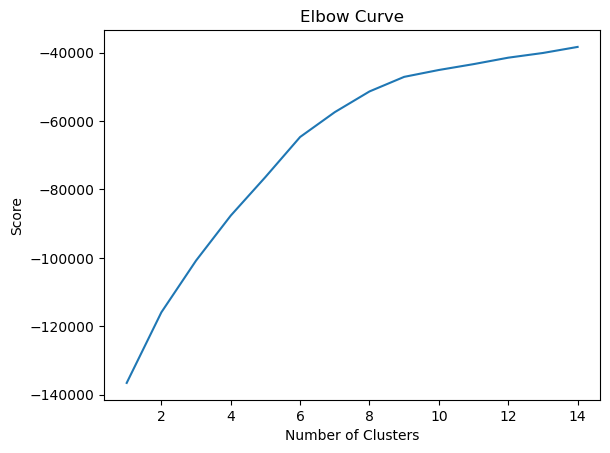

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, it is hard to determine what is the best number of clusters, but it seems that increases after 6 seem to become more and more incremental so we can take this as the value to use for us.

### 3. k-means clustering

In [14]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 6)

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

C:\Users\Nuno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [16]:
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)
df['clusters'] = kmeans.fit_predict(df_scaled)

C:\Users\Nuno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nuno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
df_scaled.head()

,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,clusters
0,-1.034340,-0.012957,-1.122927,-0.155256,4.868456,0.313738,-0.215093,0.762339,3
1,0.161246,0.068360,-1.113754,-0.126078,0.370943,0.160666,-0.215093,-0.033642,0
2,-0.785752,-0.175589,0.684081,1.342585,4.540967,-1.216978,0.099844,0.821851,3
3,-0.253066,0.881524,-1.040373,0.788189,-0.524193,0.772953,0.099844,-0.732915,0
4,0.042871,-0.094273,0.188759,1.352311,3.187347,0.619881,-0.215093,0.710265,3


In [18]:
df.head()

,id,host_id,host_since,host_is_superhost,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,cancellation_policy,calculated_host_listings_count,reviews_per_month,clusters
0,2818,3159,2008-09-24,t,1.0,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Apartment,Private room,...,44,44,248,2009-03-30,2018-11-28,97.0,strict_14_with_grace_period,1,2.10,3
1,3209,3806,2008-10-24,f,1.0,Westerpark,52.390225,4.873924,Apartment,Entire home/apt,...,0,47,42,2015-07-31,2018-08-29,96.0,moderate,1,1.03,1
2,20168,59484,2009-12-02,f,2.0,Centrum-Oost,52.365087,4.893541,Townhouse,Entire home/apt,...,24,198,233,2010-03-02,2018-11-30,87.0,strict_14_with_grace_period,2,2.18,3
3,25428,56142,2009-11-20,f,2.0,Centrum-West,52.373114,4.883668,Apartment,Entire home/apt,...,44,141,1,2018-01-21,2018-01-21,100.0,strict_14_with_grace_period,2,0.09,1
4,27886,97647,2010-03-23,t,1.0,Centrum-West,52.386727,4.892078,Houseboat,Private room,...,54,199,171,2012-01-09,2018-11-25,99.0,strict_14_with_grace_period,1,2.03,3


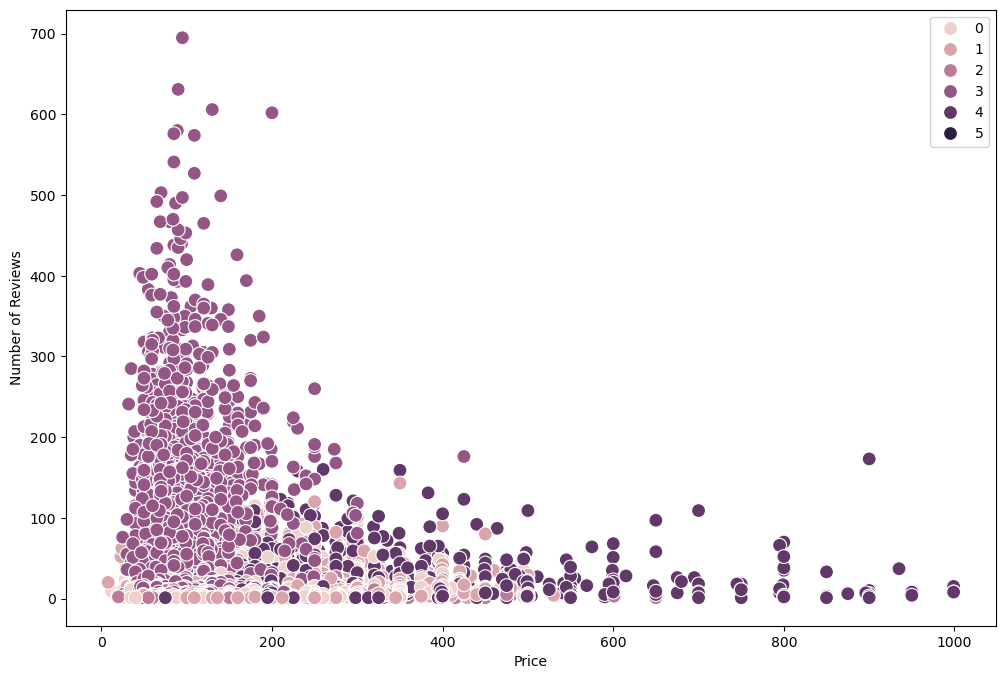

In [19]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['price'], y=df['number_of_reviews'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Number of Reviews') # Label y-axis.
plt.show()

There seems to be at least two identifiable patterns to the clusters (price vs nreviews):
    Cluster 1 is limited to lower price listings
    Cluster 3 only happens for a low number of reviews

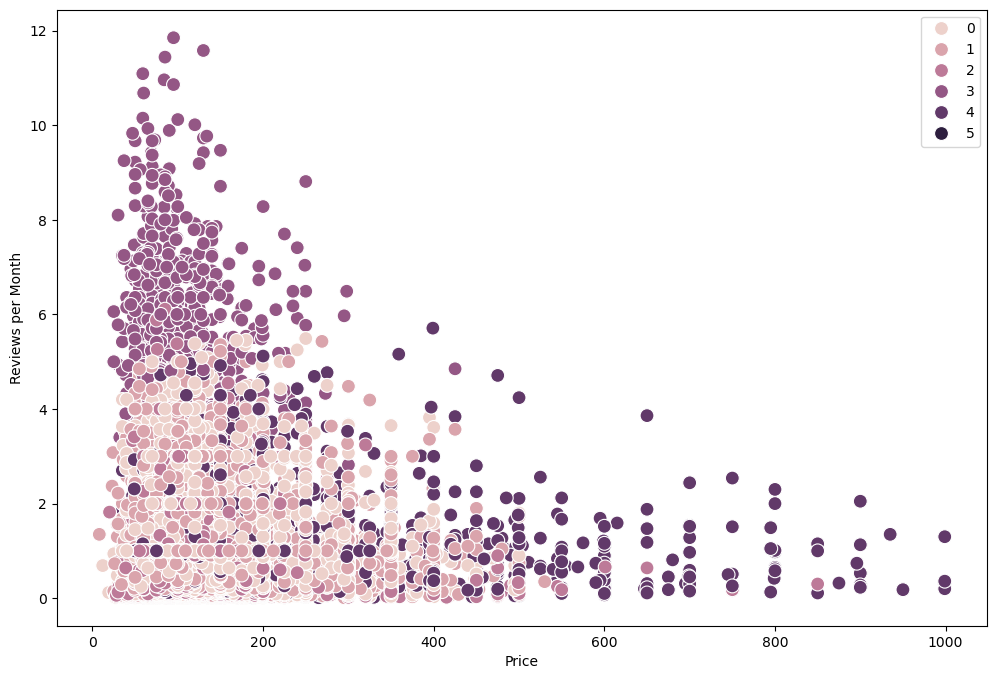

In [20]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['price'], y=df['reviews_per_month'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Reviews per Month') # Label y-axis.
plt.show()

There seems to be at least three identifiable patterns to the clusters(price vs reviews per month):
    Cluster 2 is common at low price, with only few listings at mid prices
    Cluster 3 happens more for a low number of reviews per month
    The remaining clusters are grouped together at the low to mid range for price and reviewsper month

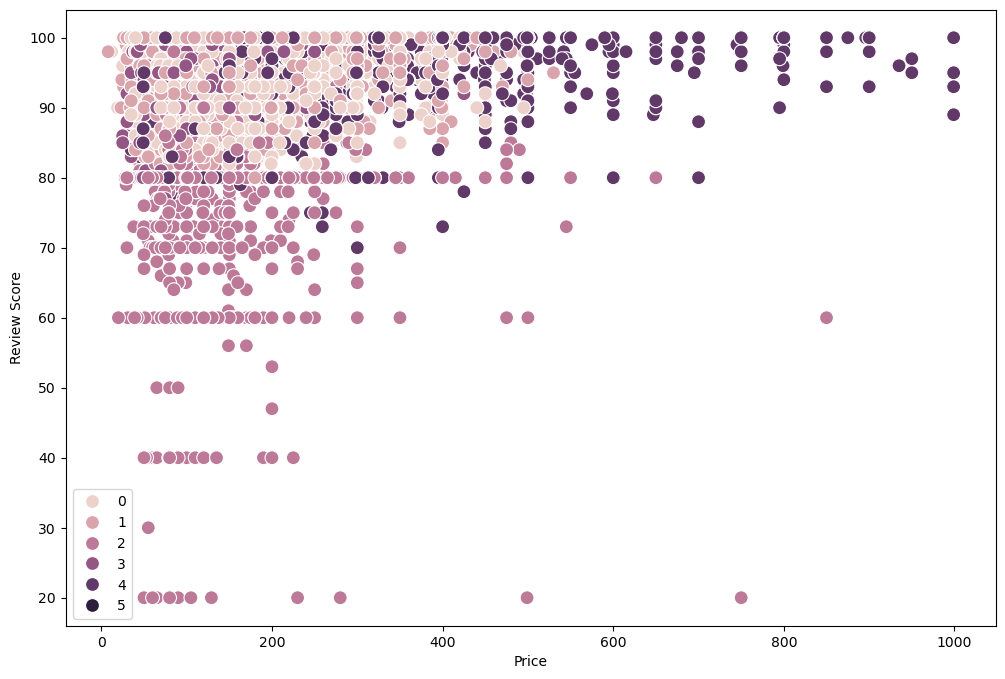

In [21]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['price'], y=df['review_scores_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Review Score') # Label y-axis.
plt.show()

There seems to be no cluster based pattern. For the whole dataset, there are few low ratings, and they seem to be more common for lower price listings, with only a small amount of mid and high price listings having low reviews. Most of the review rating is above 60.

In [25]:
#Change the name of the clusters to their characteristics
df.loc[df['clusters'] == 5, 'cluster'] = 'black'
df.loc[df['clusters'] == 4, 'cluster'] = 'avg price high availability'
df.loc[df['clusters'] == 3, 'cluster'] = 'high price high availability'
df.loc[df['clusters'] == 2, 'cluster'] = 'low price high availability'
df.loc[df['clusters'] == 1, 'cluster'] = 'avg price low availability'
df.loc[df['clusters'] == 0, 'cluster'] = 'avg price low availability short term rentals'

In [27]:
df['cluster'].value_counts()

cluster
avg price low availability short term rentals    6834
avg price low availability                       6086
avg price high availability                      2026
high price high availability                     1108
low price high availability                      1015
black                                               2
Name: count, dtype: int64

In [23]:
#Groupby cluster and show descriptive statistics
df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'reviews_per_month':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'],
                          'review_scores_rating':['mean', 'median'],
                          'minimum_nights':	['mean', 'median'],
                           'maximum_nights':['mean', 'median'],
                          'availability_365' : ['mean','median']})

price         \
                                                     mean median   
cluster                                                            
avg price high availability                    221.528134  178.5   
avg price low availability                     140.157246  125.0   
avg price low availability short term rentals  139.078870  125.0   
black                                          125.000000  125.0   
high price high availability                    99.607401   90.0   
low price high availability                    133.923153  119.0   

                                              reviews_per_month         \
                                                           mean median   
cluster                                                                  
avg price high availability                            1.112285  0.880   
avg price low availability                             0.820818  0.600   
avg price low availability short term rentals          0.748134  0.520   
black                                                  0.850000  0.850   
high price high availability                           4.871200  4.705   
low price high availability                            0.585626  0.270   

                                              number_of_reviews         \
                                                           mean median   
cluster                                                                  
avg price high availability                           28.247285   20.0   
avg price low availability                            16.416858   10.0   
avg price low availability short term rentals         14.103453    9.0   
black                                                 14.000000   14.0   
high price high availability                         149.955776  133.0   
low price high availability                            7.129064    3.0   

                                              review_scores_rating         \
                                                              mean median   
cluster                                                                     
avg price high availability                              95.275913   96.0   
avg price low availability                               96.392705   98.0   
avg price low availability short term rentals            96.099210   97.0   
black                                                    93.500000   93.5   
high price high availability                             94.845668   96.0   
low price high availability                              78.034483   80.0   

                                              minimum_nights          \
                                                        mean  median   
cluster                                                                
avg price high availability                         4.243337     2.0   
avg price low availability                          3.183043     2.0   
avg price low availability short term rentals       2.717442     2.0   
black                                            1000.000000  1000.0   
high price high availability                        2.027978     2.0   
low price high availability                         3.099507     2.0   

                                              maximum_nights          \
                                                        mean  median   
cluster                                                                
avg price high availability                       640.017769  1125.0   
avg price low availability                         42.684686    16.0   
avg price low availability short term rentals    1125.716272  1125.0   
black                                            1125.000000  1125.0   
high price high availability                      563.326715   365.0   
low price high availability                       817.076847  1125.0   

                                              availability_365         
                                         

The description of the clusters helps paint a clearer picture than the visualizations.
The black cluster is too small to have great meaning (2 counts), but was probably isolated due to the high average minimum rental time of 2 years and 270 days.
The dark purple cluster represents averagely priced, poorly rated houses with moderate popularity
The light purple cluster represents cheaper listings, with high ratings, and low popularity (somehwat high availability)
The pink cluster represents averagely priced listings that are highly popular
The purple cluster represents high price listings that are not popular (high availability)
The skin tone cluster represents averagely priced listings that are highly popular but only for short term rentals.

When we match the new clustering information with the count information we see that most listings are not specificaly made for long term rental. 

We can also see that both review scores and price are pretty similar for all clusters that aren't dark purple and purple  respectively.

In [28]:
#Drop Black cluster
df=df[df['cluster'] != 'black']

In [29]:
df['cluster'].value_counts()

cluster
avg price low availability short term rentals    6834
avg price low availability                       6086
avg price high availability                      2026
high price high availability                     1108
low price high availability                      1015
Name: count, dtype: int64

In [30]:
#Show the mode for each cluster
from scipy import stats
# Custom mode function
def mode(series):
    return series.mode()[0]

# Group by and aggregate
result = df.groupby('cluster').agg({
    'host_is_superhost': mode, 
    'neighbourhood_cleansed': mode, 
    'property_type': mode,
    'room_type': mode,
    'accommodates': mode,
    'bathrooms': mode,
    'bedrooms': mode,
    'beds': mode
})

print(result)

                                              host_is_superhost  \
cluster                                                           
avg price high availability                                   f   
avg price low availability                                    f   
avg price low availability short term rentals                 f   
high price high availability                                  t   
low price high availability                                   f   

                                               neighbourhood_cleansed  \
cluster                                                                 
avg price high availability                              Centrum-West   
avg price low availability                     De Baarsjes - Oud-West   
avg price low availability short term rentals  De Baarsjes - Oud-West   
high price high availability                             Centrum-West   
low price high availability                    De Baarsjes - Oud-West   

                  

In [32]:
df.to_csv(os.path.join(path,'02 Data','Prepared Data','score_analysis_with_clusters.csv'))